# Los diferentes algoritmos de integración de ecuaciones diferenciales

Los métodos para resolver ecuaciones diferenciales que se describen a continuación tienen como principal idea iterar en un ciclo for la ecuación $y_n$ (distinta en cada método). La solución es un conjunto de datos en un intervalo de tiempo $x$. Cuando el método funciona 

In [4]:
from pylab import*
%matplotlib inline

## Integración con el método de Euler

#### Derivación

Su principal idea es que la gráfica de una función desconocida $f$ se puede aproximar con una poligonal. 

El punto inicial $(x_0,y_0=f(x_0))$, que pertenece a la gráfica de la función $f$, es el primer punto de la poligonal y en dicho punto vamos a evaluar la derivada $f'$ de nuestra función (ésta la conocemos pues precisamente nuestra ecuación diferencial nos está dando una expresión para ella), y por tanto podemos conocer la pendiente $m$ en ese punto: $\ \ m_0=f'(x_0)$.

Los demás puntos son obtenidos mediante un proceso iterativo: 

\begin{equation}
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (1) \\
y_n=f(x_n)=f(x_{n-1}+h) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (2)
\end{equation}

Ahora bien, por Taylor a primer orden:

$$
f(x_{n-1}+h) \simeq f(x_{n-1})+hf'(x_{n-1})
$$

La función $f'$ es desconocida pero podemos aproximarla como una recta con pendiente $m_{n-1}=f'(x_{n-1})$ que tiene como dominio $[x_{n-1},x_{n}]$ y que pasa por el punto $x_{n-1}$.

De ésta manera, la gráfica de la función $f$ adopta la forma de una poligonal que tiene como vértices los puntos de la forma $(x_n,f(x_n))$.  La arista entre dos puntos $(x_n,y_n)$ y $(x_{n+1},y_{n+1})$ es una recta descrita por la ecuación: 

$$
f_{n}(z)=y_{n}+zm_{n} \ \ \ \ \ \ \ \ z \in [x_{n},x_{n+1}]
$$

En particular cuando $z=x_{n+1}$:

$$
y_{n+1}= f_{n}(x_{n+1})=y_{n}+x_{n+1}m_{n}=f(x_n)+x_{n+1}f'(x_n)=f(x_n)+hf'(x_n)
$$

Quedando entonces que las ecuaciones (1) y (2) se convierten en:

$$
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (3)\\
y_n=f(x_n)+hf'(x_n) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (4)
$$

Las funciones que vamos a definir a continuación, hacen un proceso iterativo con la ecuación (4) mediante un ciclo for. Por otra parte, con la función arrange generan una partición del segmento [x[0],x[1]] con puntos que distan h entre sí, para obtener los puntos de la ecuación (3).

#### Código

In [5]:
def euler_1orden(ec,p_ini,x,h=0.1):
    #ec es la ecuación diferencial que queremos resolver. 
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos = arange(x[0],x[1]+h,h)
    #arrange esta creando un vector con valores desde la primer coordenada del vector p_ini 
    #hasta t_final con distancias h.
    
    sol = zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]= p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón. 
    
    for i in range(len(tiempos)-1):
        sol[i+1,:] = sol[i,:] + h*ec(sol[i],tiempos[i])
    #el ciclo for está iterando la función del método de Euler
    #cada iteración i se va almacenando en renglón i del arreglo sol
    
    return tiempos,sol
    #la función da como resultado el arreglo tiempos y el arreglo sol.

## Integración sobre serie de Taylor a segundo orden

#### Derivación

En el método de Euler de primer orden escribimos la función mediante una serie de Taylor a primer orden, en éste caso, vamos a usar la serie de Taylor hasta orden 2:
$$
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (1) \\
y_n=f(x_n)=f(x_{n-1}+h) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (2)
$$

Por lo tanto, para la ecuación (2) utilizaremos la siguiente aproximación:

$$
f(x_{n-1}+h) \simeq f(x_{n-1})+hf'(x_{n-1})+\frac{h^2}{2!}f''(x_{n-1}) \ \ \ \ \ \ \ \ \ \ \ \dots (3)
$$

Ahora bien, como la ecuación diferencial $(f'(x)=g(x,y))$ es una expresión para la derivada de $f$, la segunda derivada de $f$ es de la forma:

$$
f''(x)=\frac{d}{dx}f'(x)=\frac{d}{dx}g(x,y)=\frac{\partial g(x,y)}{\partial x}+\frac{\partial g(x,y)}{\partial y}\frac{\partial y}{\partial x}=\frac{\partial f'(x)}{\partial x}+\frac{\partial f'(x)}{\partial y}f'(x)
$$

Entonces sustituyendo en (3) tenemos que:

$$
f(x_{n-1}+h) \simeq f(x_{n-1})+hf'(x_{n-1})+\frac{h^2}{2} \left( \frac{\partial f'(x_{n-1})}{\partial x} +\frac{\partial f'(x_{n-1})}{\partial y}f'(x_{n-1}) \right)
$$

Quedando que las ecuaciones (1) y (2) se convierten en:


$$
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \dots (4)\\
y_n=f(x_n)+hf'(x_n)+ \frac{h^2}{2}\left( \frac{\partial f'(x_{n})}{\partial x} +\frac{\partial f'(x_{n})}{\partial y}f'(x_{n}) \right)\ \ \ \  \ \ \dots (5)
$$


Las funciones que vamos a definir a continuación, hacen un proceso iterativo con la ecuación (5) mediante un ciclo for. Por otra parte, con la función arrange generan una partición del segmento [x[0],x[1]] con puntos que distan h entre sí, para obtener los puntos de la ecuación (4).

#### Código

In [6]:
def euler_2orden(ec,d_ec,p_ini,x,h=0.1): 
    #ec es la ecuación diferencial que queremos resolver. Cuando es un sistema de ecuaciones, 
    #necesitamos escribir el vector con la información como un array.
    #d_ec es la derivada de ec, cuando tenemos un sistema de ecuaciones, toda la información de 
    #la derivada (una matriz) se escribe en forma de array.
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos=arange(x[0],x[1]+h,h) 
    
    sol=zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]=p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón. 
    
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))          
    #el ciclo for está haciendo tres cosas
        #evaluar la ecuación original en los valores del renglón i para el tiempo i
        #evaluar la derivada de la ecuación en los valores del renglón i, en el tiempo i
        #iterar la función del método de Euler a 2do orden usando los valores que obtuvimos para df, jac y f
    #las primeras dos expresiones son argumentos necesarios para ir obteniendo los renglones del arreglo sol.
    #cada iteración i se va almacenando en renglón i del arreglo sol
              
    return tiempos,sol 
    #la función da como resultado el arreglo tiempos y el arreglo sol.

## Integración con el método de Runge-Kutta

### Segundo orden

#### Derivación

#### Código

In [7]:
def runge_kutta2(ec,p_ini,x,h=0.1):
    #ec es la ecuación diferencial que queremos resolver. Cuando es un sistema de ecuaciones, 
    #necesitamos escribir el vector con la información como un array.
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos = arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]=p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón. 
    
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    #el ciclo for está haciendo tres cosas
        #obtener la imágen de una función f que es  la ecuación original en los valores del renglón i para el tiempo i
        #evaluar la derivada de la ecuación en los valores del renglón i, en el tiempo i
        #iterar la función del método de Euler usando los valores que obtuvimos para df, jac y f
    #las primeras dos expresiones son argumentos necesarios para ir obteniendo los renglones del arreglo sol.
    #cada iteración i se va almacenando en renglón i del arreglo sol
              
    return tiempos, sol
    #la función da como resultado el arreglo tiempos y el arreglo sol.

### Cuarto orden

#### Derivación

#### Código

In [8]:
def runge_kutta4(ec,p_ini,x,h=0.1):
    #ec es la ecuación diferencial que queremos resolver. Cuando es un sistema de ecuaciones, 
    #necesitamos escribir el vector con la información como un array.
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos = arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]=p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón.
    
    for i in xrange(len(tiempos)-1):
        k1=ec(sol[i,:],tiempos[i])
        k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.0)*(k1+2*k2+2*k3+k4)
    #el ciclo for está haciendo tres cosas
        #obtener la imágen de una función f que es  la ecuación original en los valores del renglón i para el tiempo i
        #evaluar la derivada de la ecuación en los valores del renglón i, en el tiempo i
        #iterar la función del método de Euler usando los valores que obtuvimos para df, jac y f
    #las primeras dos expresiones son argumentos necesarios para ir obteniendo los renglones del arreglo sol.
    #cada iteración i se va almacenando en renglón i del arreglo sol
    
    return tiempos, sol
    #la función da como resultado el arreglo tiempos y el arreglo sol.

## Verificación de los integradores

Para probar los integradores vamos a usar la ecuación:

$$
\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}sin(3t)
$$

Renombrando:
$$
z_1=x  \ \ \ \ \ \Rightarrow \ \ \ \  \dot{z_1}=\dot{x}=z_2
$$ 
$$
z_2=\dot{x}  \ \ \ \ \ \Rightarrow \ \ \  \ \ \ \ \ \ \ \ \ \dot{z_2}=\ddot{x}
$$

Quedando entonces un sistema de ecuaciones:

$$
\dot{z_1}=z_2 \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
$$
$$
\dot{z_2}=-0.5z_2-\sin(z_1)+e^{-t}sin(3t)
$$

Y su derivada va a ser:

$$
\ddot{z_1}=-0.5z_2-\sin(z_1)+e^{-t}sin(3t) \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
$$
$$
\ddot{z_2}=-0.5(-0.5z_2-\sin(z_1)+e^{-t}sin(3t))-\cos(z_1)z_2+3e^{-t}cos(3t)
$$

In [66]:
def ec1(z,t):
    return array([z[1],-0.5*z[1]-sin(z[0])+e**(-t)*sin(3*t)])

In [65]:
def d_ec1(z,t):
    return array([-0.5*z[1]-sin(z[0])+e**(-t)*sin(3*t),-0.5*(-0.5*z[1]-sin(z[0])+e**(-t)*sin(3*t))-cos(z[0])*z[1]+3*e**(-t)*cos(3*t)])

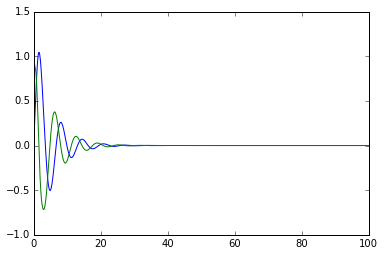

In [90]:
t,e1 = euler_1orden(ec1,[0,1],[0,100])
ylim([-1,1.5])
xlim([0,100])
plot(t,e1)
show()

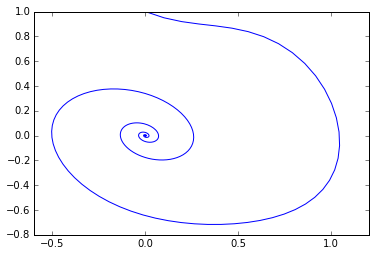

In [91]:
plot(e1[:,0],e1[:,1])
show()

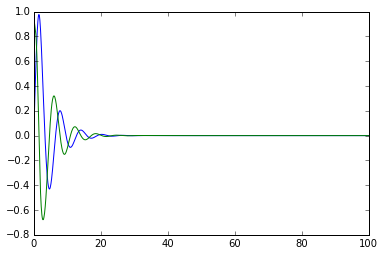

In [88]:
t, e2 = euler_2orden(ec1,d_ec1,[0,1],[0,100])
plot(t,e2)
show()

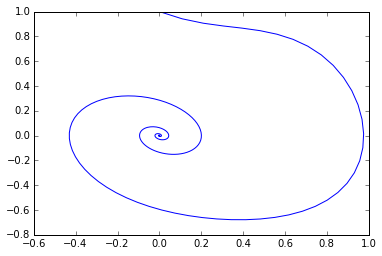

In [89]:
plot(e2[:,0],e2[:,1])
show()

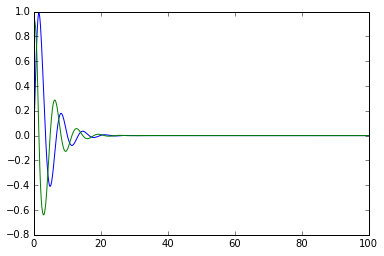

In [70]:
t,k2 = runge_kutta2(ec1,[0,1],[0,100])
plot(t,k2)
show()

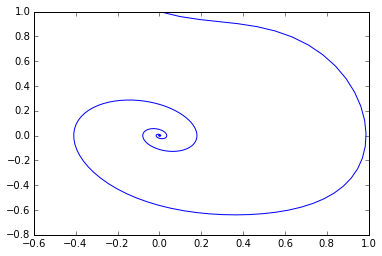

In [82]:
plot(k2[:,0],k2[:,1])
show()

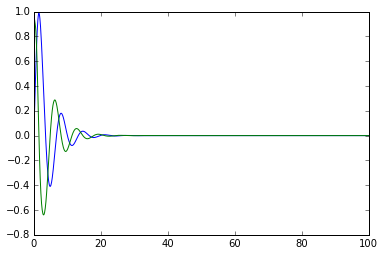

In [86]:
t,k4 = runge_kutta4(ec1,[0,1],[0,100])
plot(t,k4)
show()

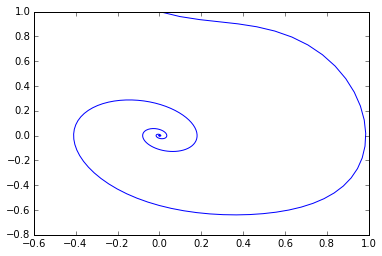

In [87]:
plot(k4[:,0],k4[:,1])
show()

## Encontrar el mejor paso de integración

La ecuación:

$$
\dddot{y}+\ddot{y}^2-3\dot{x}^3+cos^2(x)=e^{-t}\sin(3t)
$$

se puede escribir como un sistema de ecuaciones de primer órden, con el siguiente cambio de variable:

$$
z=\ddot{y} \ \ \ \ \ \ \ \Rightarrow \ \ \ \ \ \ \dot{z}=\dddot{y}
$$

Quedando entonces que:

$$

$$